In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import prophet
from Prophet_model import preprocessing, prophet_model

# Masquer les logs lors de l'entrainement du modèle
import os
import sys

In [2]:
# Exécuter cette cellule si vous rencontrez des soucis d'installation avec Prophet
# pip install prophet
# import cmdstanpy
# cmdstanpy.install_cmdstan()

In [3]:
# Rediriger la sortie standard et d'erreur vers /dev/null
sys.stdout = open(os.devnull, "w")
sys.stderr = open(os.devnull, "w")

In [4]:
# Lecture du data set
df2 = pd.read_csv("full_dataset_normalized_2.csv", low_memory = False)

In [10]:
# Choisir ici un code de département, un type de délit et une période de prévision temporelle 
code_dep = 'France_Métro'
delit = "Vols"
periode = 36

# Preprocessing
df = preprocessing(df2, code_dep, delit)

# Création du modèle
model = prophet_model(df,code_dep,delit,periode)
# Visualisation de la série temporelle
model.serie_temporelle()

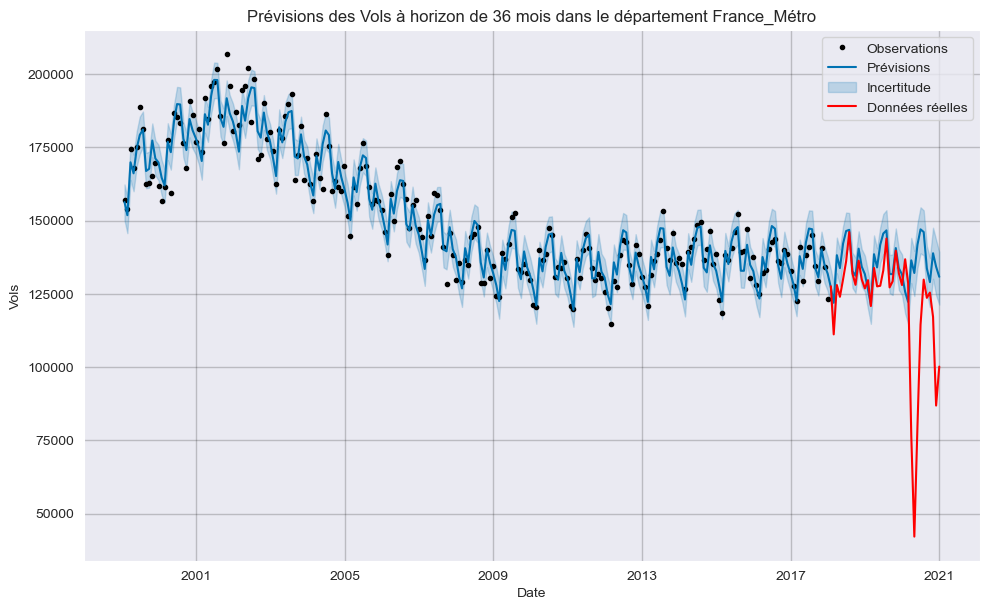

In [11]:
# Entrainement du modèle et prévisions
df_train, df_test = model.split_data()
trained_model, forecast = model.entrainement(df_train,df_test)
model.prevision(trained_model,forecast,df_test)

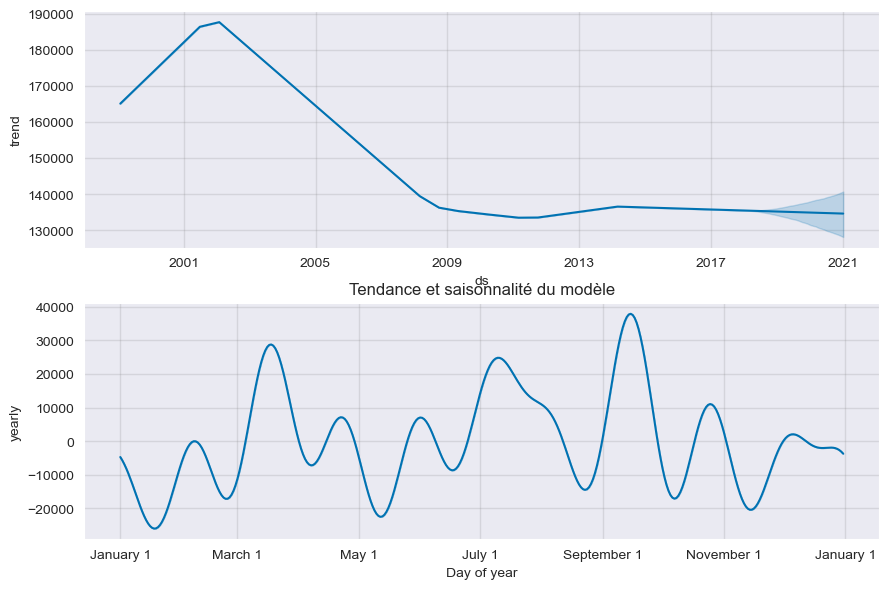

In [7]:
# Tendance et saisonnalité du modèle
model.tendance(trained_model,forecast)